In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

In [2]:
GF = 1.1663788e-5 #GeV-2
mZ = 91.1876 #GeV
mtau = 1.77686 #GeV
mmu = 105.6583755e-3 #GeV
me = 0.51099895e-3 #GeV
t = mtau**2/mZ**2
prefactor = 2**0.5/4*mZ**2*GF #(g/4cW)^2
hbarc = 0.1973269804e-9 # GeV μm
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
s2Weff = 0.23122 #\sin^2\theta_W with 1-loop corrections
c2Weff = 1-s2Weff
c = 1-4*s2W

Lambda = 1000

In [3]:
l0 = 192*np.pi**3*hbarc/(mZ*prefactor)*Lambda**2/mtau**2

In [4]:
l0

0.11899505524504235

In [5]:
def Gamma_phi(mphi: float) -> float:
    Gamma_tau = mphi * mtau**2/(8*np.pi*Lambda**2)*(1-4*mtau**2/mphi**2)
    Gamma_mu = mphi * mmu**2/(8*np.pi*Lambda**2)*(1-4*mmu**2/mphi**2)
    Gamma_e = mphi * me**2/(8*np.pi*Lambda**2)*(1-4*me**2/mphi**2)
    return 0 + (mphi > 2*me)*Gamma_e + (mphi > 2*mmu)*Gamma_mu + (mphi > 2*mtau)* Gamma_tau

In [6]:
list_mphi = [10**x for x in np.linspace(-3, 1, 50)]
listGamma = [hbarc/Gamma_phi(m) for m in list_mphi]

/tmp/ipykernel_18936/1428545938.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  listGamma = [hbarc/Gamma_phi(m) for m in list_mphi]


Text(0, 0.5, '$c_\\tau^2 d$ [nm]')

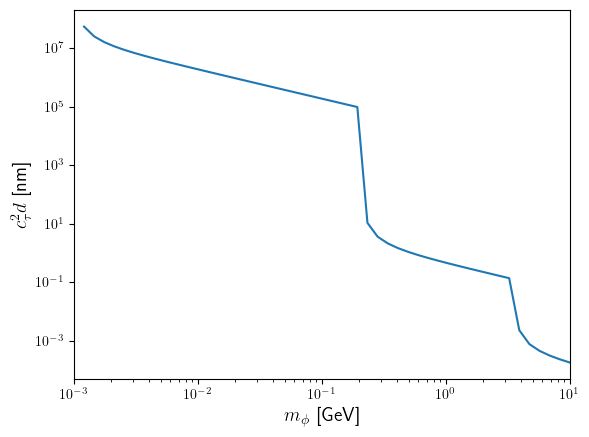

In [7]:
plt.loglog(list_mphi, listGamma)
#plt.ylim(0, 2e-6)
plt.xlim(1e-3, 10)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r"$c_\tau^2 d$ [nm]", fontsize=14)

In [8]:
def integrand(x2, x1, mphi):
    r = mphi**2/mZ**2
    eps = t
    return (-2+4*x1+4*x2-8*x1*x2-x1**2-x2**2+2*x1*x2**2+2*x1**2*x2+c**2-eps-2*r**2+2*r**2*c**2)/(1-x1)/(1-x2) + r/(1-x1)**2/(1-x2**2)*(4-8*x1-8*x2+16*x1*x2+3*x1**2+3*x2**2-6*x1*x2**2-6*x1**2*x2+2*x1**2*x2**2+eps*(8-8*x1-8*x2+4*x1**2+4*x2**2)+c**2*(-6+8*x1+8*x2-8*x1*x2-3*x1**2-3*x2**2+2*x1*x2**2+2*x1**2*x2)+c**2*eps*(-8+8*x1+8*x2-4*x1*x2-2*x1**2-2*x2**2))

In [9]:
def x2min(x1, mphi):
    r = mphi**2/mZ**2
    eps = t
    return (2-2*r-3*x1+r*x1+x1**2+4*eps-2*x1*eps-(x1**2-4*eps)**0.5*(1-2*r+r**2-2*x1+2*r*x1+x1**2-4*r*eps)**0.5)/2/(1-x1+eps)

In [10]:
def x2max(x1, mphi):
    r = mphi**2/mZ**2
    eps = t
    return (2-2*r-3*x1+r*x1+x1**2+4*eps-2*x1*eps+(x1**2-4*eps)**0.5*(1-2*r+r**2-2*x1+2*r*x1+x1**2-4*r*eps)**0.5)/2/(1-x1+eps)

In [11]:
def dGammadx1(x1, mphi):
    return quad(integrand, x2min(x1, mphi), x2max(x1, mphi), (x1, mphi))[0]

In [12]:
def Gamma(mphi: float) -> float:
    r = mphi**2/mZ**2
    eps = t
    x1min = 2*eps**0.5
    x1max = 1-r-2*eps**0.5*r**0.5
    return quad(lambda x1: dGammadx1(x1, mphi), x1min, x1max)[0]

In [13]:
def p_phi(x2, x1, mphi):
    Ephi = (0.5-x1-x2)*mZ
    return (Ephi**2-mphi**2)**0.5/mphi

def p_integrand(x2, x1, mphi):
    return p_phi(x2, x1, mphi)*integrand(x2, x1, mphi)

def p_dGammadx1(x1, mphi):
    return quad(p_integrand, x2min(x1, mphi), x2max(x1, mphi), (x1, mphi))[0]

def p_Gamma(mphi: float) -> float:
    r = mphi**2/mZ**2
    eps = t
    x1min = 2*eps**0.5
    x1max = 1-r-2*eps**0.5*r**0.5
    return quad(lambda x1: p_dGammadx1(x1, mphi), x1min, x1max)[0]

In [14]:
list_mphi = [10**x for x in np.linspace(-3, 2, 50)]
list_d = np.array([p_Gamma(m)/Gamma(m)*hbarc/Gamma_phi(m) for m in list_mphi])

/tmp/ipykernel_18936/2824218157.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda x1: p_dGammadx1(x1, mphi), x1min, x1max)[0]
/tmp/ipykernel_18936/2518014016.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges

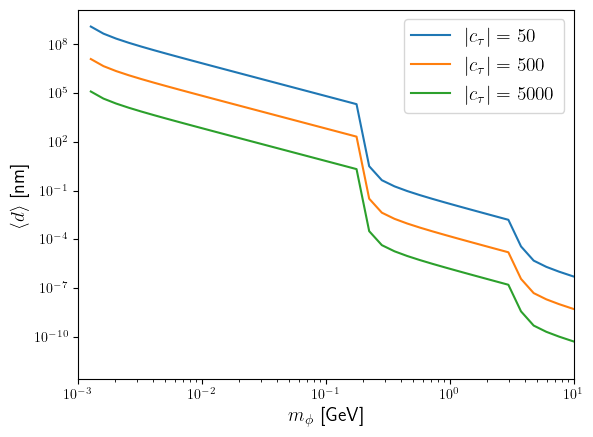

In [15]:
plt.loglog(list_mphi, list_d/50**2, label=r"$|c_\tau| = 50$")
plt.loglog(list_mphi, list_d/500**2, label=r"$|c_\tau| = 500$")
plt.loglog(list_mphi, list_d/5000**2, label=r"$|c_\tau| = 5000$")
plt.xlabel(r"$m_\phi$ [GeV]", fontsize=14)
plt.ylabel(r"$\langle d\rangle$ [nm]", fontsize=14)
plt.xlim(1e-3, 10)
plt.legend(fontsize=14)